<h1>FORECASTING HOUSE PRICE INDEX IN NCR AREAS<h1>

<h3>IMPORTING LIBRARIES AND DATASET</h3>

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

               Date  NCR RREPI
Quarter                       
Q1       01/03/2014      100.0
Q2       01/06/2014      108.6
Q3       01/09/2014      108.1
Q4       01/12/2014      111.5
Q1       01/03/2015      109.6


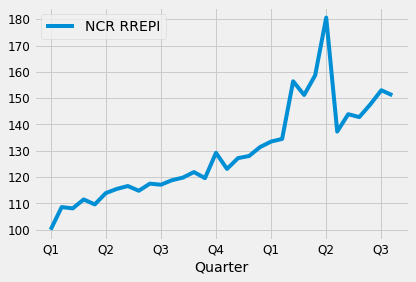

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

df = read_csv('/content/draft-ncr.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, )
print(df.head())
df.plot()
pyplot.show()

<h3>DATA PREPROCESSING</h3>


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Quarter'] = df['Date'].dt.to_period('Q')

In [ ]:
df.isnull().sum()

Date         0
NCR RREPI    0
Quarter      0
dtype: int64

In [ ]:
df = df.dropna()
print(df)

              Date  NCR RREPI Quarter
Quarter                              
Q1      2014-01-03      100.0  2014Q1
Q2      2014-01-06      108.6  2014Q1
Q3      2014-01-09      108.1  2014Q1
Q4      2014-01-12      111.5  2014Q1
Q1      2015-01-03      109.6  2015Q1
Q2      2015-01-06      113.9  2015Q1
Q3      2015-01-09      115.5  2015Q1
Q4      2015-01-12      116.6  2015Q1
Q1      2016-01-03      114.8  2016Q1
Q2      2016-01-06      117.5  2016Q1
Q3      2016-01-09      117.1  2016Q1
Q4      2016-01-12      118.8  2016Q1
Q1      2017-01-03      119.8  2017Q1
Q2      2017-01-06      121.9  2017Q1
Q3      2017-01-09      119.6  2017Q1
Q4      2017-01-12      129.2  2017Q1
Q1      2018-01-03      123.1  2018Q1
Q2      2018-01-06      127.2  2018Q1
Q3      2018-01-09      128.0  2018Q1
Q4      2018-01-12      131.4  2018Q1
Q1      2019-01-03      133.5  2019Q1
Q2      2019-01-06      134.5  2019Q1
Q3      2019-01-09      156.4  2019Q1
Q4      2019-01-12      151.2  2019Q1
Q1      2020

<h3>INDEXING</h3>

In [ ]:
df.set_index('Date', inplace=True)


In [ ]:
df = df.drop(['Quarter'], axis = 1)

In [ ]:
y = df['NCR RREPI']

<h3>VISUALIZING THE BEHAVIOUR OF THE HOUSE PRICE INDEX</h3>

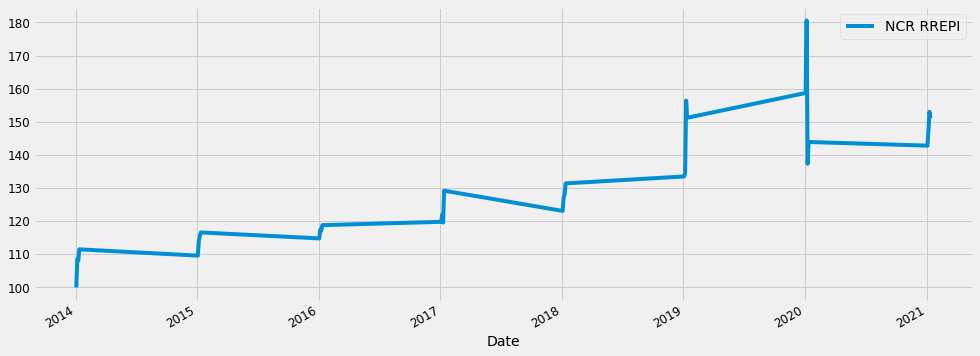

In [ ]:
df.plot(figsize=(15, 6))
plt.show()

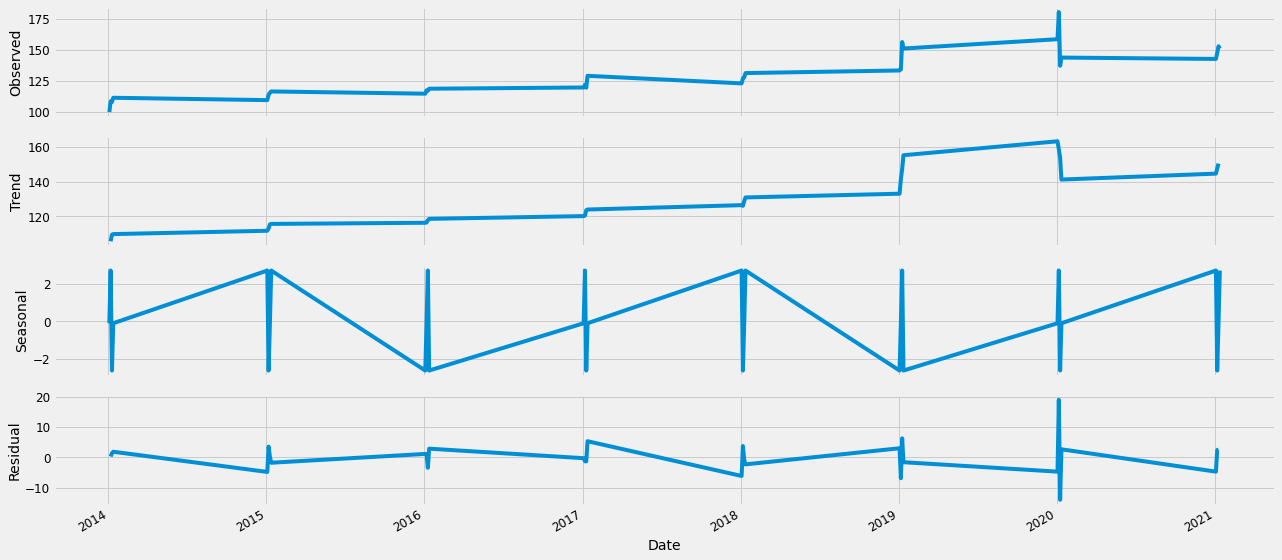

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive', freq=3)
fig = decomposition.plot()
plt.show()

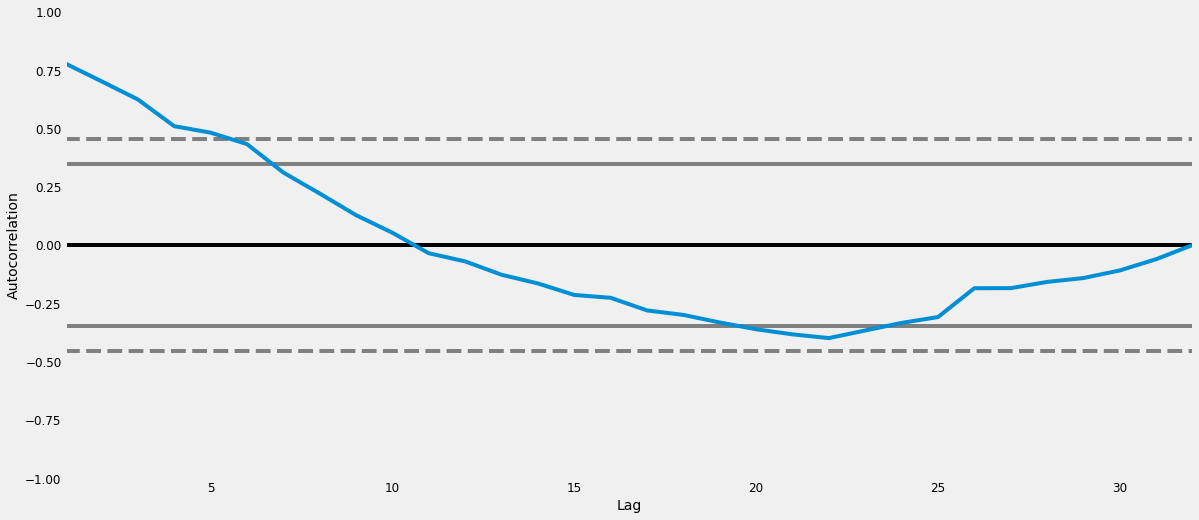

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)
pyplot.show()

<h3>CHECKING THE DESCRIPTIVE STATISTICS OF THE DATA</h3>

In [ ]:
values = df.values
parts = int(len(values)/3)
part_1, part_2, part_3 = values[0:parts], values[parts:(
    parts*2)], values[(parts*2):(parts*3)]

mean_1, mean_2, mean_3 = part_1.mean(), part_2.mean(), part_3.mean()
var_1, var_2, var_3 = part_1.var(), part_2.var(), part_3.var()

print('mean1=%f, mean2=%f, mean3=%f' % (mean_1, mean_2, mean_3))
print('variance1=%f, variance2=%f, variance3=%f' % (var_1, var_2, var_3))

mean1=111.610000, mean2=123.610000, mean3=148.650000
variance1=25.036900, variance2=22.338900, variance3=180.482500


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['NCR RREPI'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.314045
p-value: 0.996686
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646


<h3>GRID SEARCH FOR THE SUITABLE ARIMA MODEL</h3>

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
aic_results = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic_results.append(results.aic)
        except:
            continue



ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:392.51823715556577
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:178.269589548585
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:157.63978972480427
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:69.14148450090687


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:346.37476472037685
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:155.430467221127


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWa

ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:159.94467776928417
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:71.01739892374033
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:227.634765982068
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:144.1026173726862
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:153.2474705928037
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:63.59973740265822
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:217.69586576113056
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:136.5603558809697
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:152.55173404631026


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:64.65524925825954
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:236.43222082359677
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:152.06693675288548


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:149.00855642642466
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:63.80823893931763


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:224.0621276563529
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:145.30148263700062
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:151.00668077351165


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:65.00003196862251
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:224.4198048949554
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:144.3921315009624
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:146.3657246575473


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:56.21259427627
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:219.52886991451825
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:137.30234231555653
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:147.3106995294983


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:56.985711605631955


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
df = pd.DataFrame(aic_results, columns=['aic'])
print(df['aic'].min())

56.21259427627


<h3>IMPLEMENTATION OF THE ARIMA MODEL</h3>

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3340      3.590     -0.093      0.926      -7.371       6.703
ar.S.L12       0.3199     25.185      0.013      0.990     -49.042      49.682
sigma2       252.3777    454.759      0.555      0.579    -638.933    1143.688


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
y

Date
2014-01-03    100.0
2014-01-06    108.6
2014-01-09    108.1
2014-01-12    111.5
2015-01-03    109.6
2015-01-06    113.9
2015-01-09    115.5
2015-01-12    116.6
2016-01-03    114.8
2016-01-06    117.5
2016-01-09    117.1
2016-01-12    118.8
2017-01-03    119.8
2017-01-06    121.9
2017-01-09    119.6
2017-01-12    129.2
2018-01-03    123.1
2018-01-06    127.2
2018-01-09    128.0
2018-01-12    131.4
2019-01-03    133.5
2019-01-06    134.5
2019-01-09    156.4
2019-01-12    151.2
2020-01-03    158.7
2020-01-06    180.6
2020-01-09    137.3
2020-01-12    143.9
2021-01-03    142.8
2021-01-06    147.6
2021-01-09    153.0
2021-01-12    151.1
Name: NCR RREPI, dtype: float64

<h3>VALIDATION OF THE FORECAST VALUE</h3>

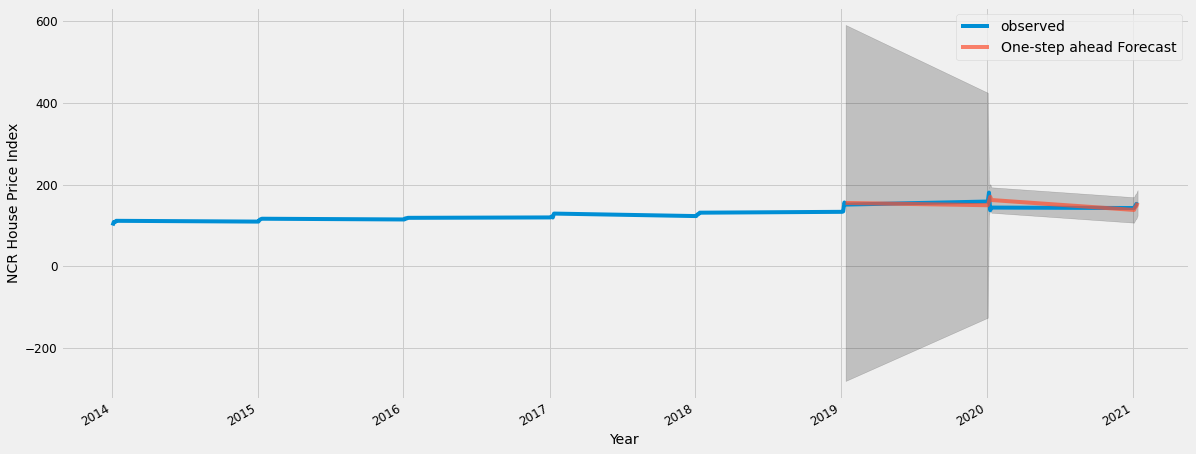

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-12'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014-01-03':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('NCR House Price Index')
plt.legend()
plt.show()

<h3>EVALUATION OF THE MODEL</h3>

In [ ]:
from sklearn import metrics
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-03':]
mse = ((y_forecasted - y_truth) ** 2).mean()
mae = np.mean(np.abs(y_truth - y_forecasted))
print('The Mean Average Error of our forecasts is {}'.format(round(mae, 2)))
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Average Error of our forecasts is 11.52
The Mean Squared Error of our forecasts is 232.59
The Root Mean Squared Error of our forecasts is 15.25


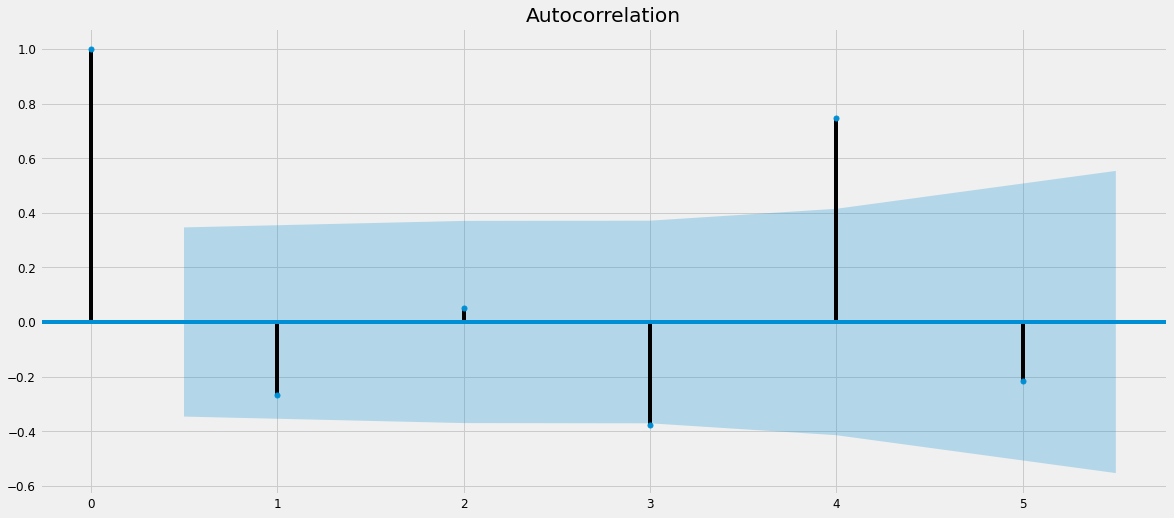

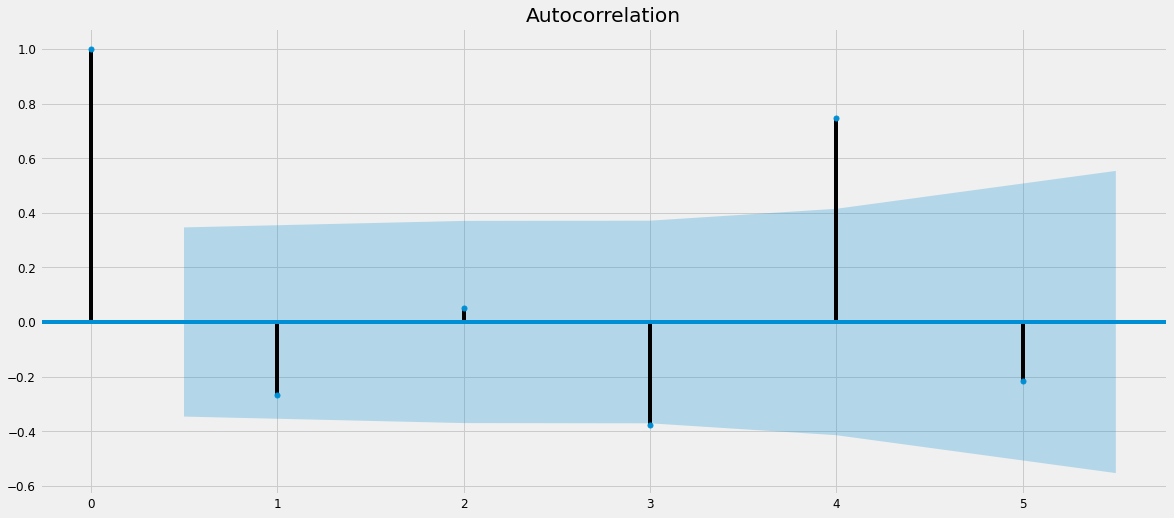

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=5)

<h3>FORECAST NCR HOUSE PRICE INDEX IN THE NEXT 10 YEARS</h3>

In [ ]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
print(pred_uc.predicted_mean)

32    156.463514
33    156.246437
34    185.505988
35    178.023300
36    187.628006
37    215.854512
38    159.439628
39    165.078863
40    165.578892
41    170.602749
dtype: float64


In [ ]:
ncr_df = pd.read_csv('/content/NCR RREPI.csv')
print(ncr_df.head())

   Year         NCR  NCR - Single Detached  NCR - Duplex  NCR-Townhouse  \
0  2022  156.463514              95.408259    165.484371     136.200316   
1  2023  156.246437              86.124940    144.941780     150.153513   
2  2024  185.505988              88.924515    163.713178     127.331374   
3  2025    178.0233              93.146595    112.970866     154.569815   
4  2026  187.628006              92.625186    142.808416     142.030445   

   NCR - Condominium  
0         182.572300  
1         189.136481  
2         223.135716  
3         212.122325  
4         223.624213  


In [ ]:
ncr_df = ncr_df.set_index('Year')
ncr_df.index

Int64Index([2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031], dtype='int64', name='Year')

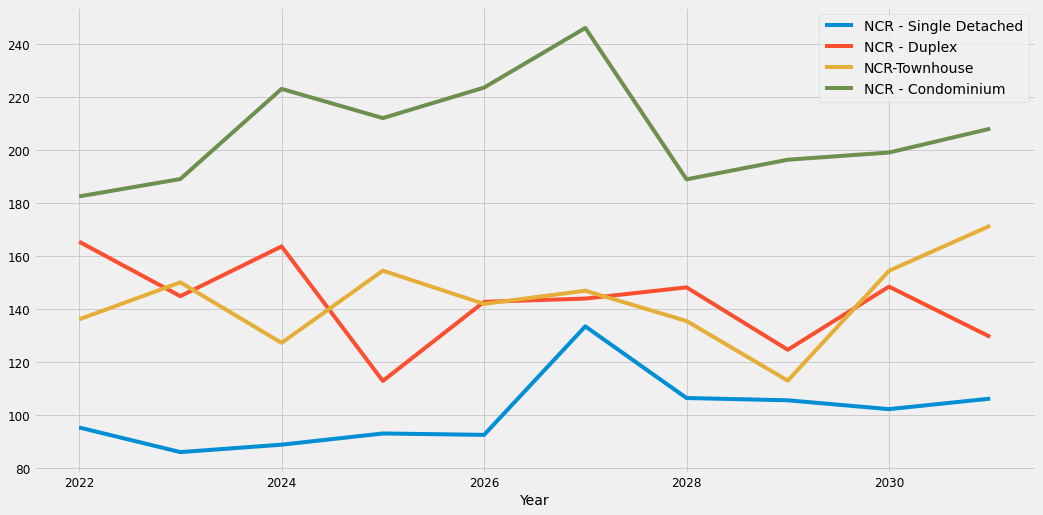

In [ ]:
ncr_df.plot(figsize=(16, 8))
plt.show()